In [1]:
import numpy as np, matplotlib.pyplot as plt
%matplotlib inline

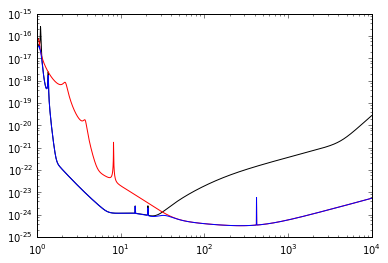

In [3]:
Noise_ET=np.loadtxt('ET_D_data.txt')
freq=Noise_ET[:,0]
noise1=Noise_ET[:,1]
noise2=Noise_ET[:,2]
noise3=Noise_ET[:,3]
plt.yscale('log')
plt.xscale('log')
plt.plot(freq,noise1,'k-',freq,noise2,'r-',freq,noise3,'b-')

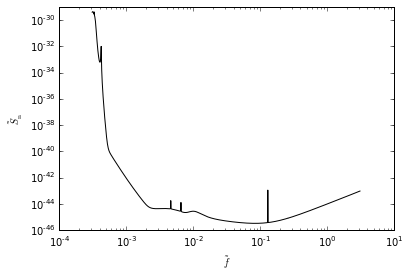

In [4]:
M1=10 # in unit of solar masses
M2=10 # in unit of solar masses
M=M1+M2;
factor=M*15.4787466e-6 #second;
freqp=freq*factor
Snp=noise3**2/factor
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\tilde{f}$')
plt.ylabel(r'$\tilde{S}_{\rm{n}}$')
plt.plot(freqp,Snp,'k-')
plt.savefig('Snprime.eps')

In [5]:
######## A table#################
y101=0.6437
y102=0.1469
y103=-0.4098
y104=-0.1331
###############################################
y111=0.827
y112=-0.1228
y113=-0.03523
y114=-0.08172
###############################################
y121=-0.2706
y122=-0.02609
y123=0.1008
y124=0.1451
###############################################
y201=-0.05822
y202=-0.0249
y203=1.829
y204=-0.2714
###############################################
y211=-3.935
y212=0.1701
y213=-0.02017
y214=0.1279
###############################################
y301=-7.092
y302=2.325
y303=-2.87
y304=4.922

x102=-920.9
x112=492.1
x122=135
x202=6742
x212=-1053
x302=-1.34e4
###########################
x103=1.702e4
x113=-9566
x123=-2182
x203=-1.214e5
x213=2.075e4
x303=2.386e5
###########################
x104=-1.254e5
x114=7.507e4
x124=1.338e4
x204=8.735e5
x214=-1.657e5
x304=-1.694e6
###########################
x105=0
x115=0
x125=0
x205=0
x215=0
x305=0
###########################
x106=-8.898e5
x116=6.31e5
x126=5.068e4
x206=5.981e6
x216=-1.415e6
x306=-1.128e7
###########################
x107=8.696e5
x117=-6.71e5
x127=-3.008e4
x207=-5.838e6
x217=1.514e6
x307=1.089e7


In [6]:
def F1(theta,phi,psi):
    plus=-0.433*((1.0+np.cos(theta)**2)*np.sin(2.0*phi)*np.cos(2.0*psi)+2.0*np.cos(theta)*np.cos(2.0*phi)*np.sin(2.0*psi))
    cross=0.433*((1.0+np.cos(theta)**2)*np.sin(2.0*phi)*np.sin(2.0*psi)-2.0*np.cos(theta)*np.cos(2.0*phi)*np.cos(2.0*psi))
    return [plus,cross]

In [7]:
# Mi is the mass of individual BH, in solar masses. chi_i is the reduced spin of BH.
GMsun=1.32754125e26 # cgs unit
DKPC=3.086e+21 # cgs unit
c=3e10 #cgs

In [8]:
def Cp(M1,M2,D,i,theta,phi,psi):
    M=M1+M2
    factor=M*15.4787466e-6 #second;
    eta=M1*M2/M**2
    result=(GMsun*M)**0.8333333/(2.0*D*DKPC*3.14159**0.6666*c**1.5)*(0.208333*eta)**0.5*np.sqrt((1.0+np.cos(i)**2)*F1(theta,phi,psi)[0]**2+4.0*np.cos(i)**2*F1(theta,phi,psi)[1]**2)/factor     
    return result

NameError: name 'D' is not defined

In [10]:
Lorentz = lambda x1,x2,x3: 1.0/3.14159*0.5*x3/((x1-x2)**2+(0.5*x3)**2)

In [11]:
def gamma(ft,M1,M2,chi1,chi2):   
    M=M1+M2;
    eta=M1*M2/M**2;
    delta=(M1-M2)/M;
    chi=(1+delta)*chi1*0.5+(1-delta)*chi2*0.5
    ###############################################
    mu01=1-4.455*(1-chi)**0.217+3.521*(1-chi)**0.26
    mu02=(1-0.63*(1-chi)**0.3)*0.5
    mu03=(1-0.63*(1-chi)**0.3)*(1-chi)**0.45*0.25
    mu04=0.3236+0.04894*chi+0.01346*chi**2
    ###############################################
    f0=np.pi*1e-3
    f1=mu01+y101*eta+y111*eta*chi+y121*eta*chi**2+y201*eta**2+y211*eta**2*chi+y301*eta**3;
    f2=mu02+y102*eta+y112*eta*chi+y122*eta*chi**2+y202*eta**2+y212*eta**2*chi+y302*eta**3;
    sigma=mu03+y103*eta+y113*eta*chi+y123*eta*chi**2+y203*eta**2+y213*eta**2*chi+y303*eta**3;
    f3=mu04+y104*eta+y114*eta*chi+y124*eta*chi**2+y204*eta**2+y214*eta**2*chi+y304*eta**3;
    ###############################################
    alpha2=-323.0/224+451.0*eta/168.0
    alpha3=(27.0/8-11.0*eta/6.0)*chi
    epsilon1=1.4547*chi-1.8897
    epsilon2=-1.8153*chi-1.6557
    ################################################    
    fp=ft/f1;
    v=ft**0.3333    
    Wm=(1+alpha2*v**2+alpha3*v**3)/(1+epsilon1*v+epsilon2*v**2)
    Wr=Wm*(f2/f1)**(-2.0/3)*(1+epsilon1*v+epsilon2*v**2)/Lorentz(f2,f2,sigma)
    if (ft<f1) and (ft>f0):
        result=ft**(-7.0/6)*(1+alpha2*v**2+alpha3*v**3);
    elif (ft>=f1) and (ft<f2):
        result=Wm*f1**(-7.0/6)*fp**(-2.0/3)*(1+epsilon1*v+epsilon2*v**2);
    elif ft>=f2 and ft<f3:
        result=Wr*f1**(-7.0/6)*Lorentz(ft,f2,sigma)
    else: 
        result=0
    return [result,f1,f2,f3]

In [36]:
f0=np.pi*1e-3

In [13]:
# def show(M1,M2,chi1,chi2):
#     M=M1+M2
#     eta=M1*M2/M**2;
#     delta=(M1-M2)/M;
#     chi=(1+delta)*chi1*0.5+(1-delta)*chi2*0.5
#     ###############################################
#     mu01=1-4.455*(1-chi)**0.217+3.521*(1-chi)**0.26
#     mu02=(1-0.63*(1-chi)**0.3)*0.5
#     mu03=(1-0.63*(1-chi)**0.3)*(1-chi)**0.45*0.25
#     mu04=0.3236+0.04894*chi+0.01346*chi**2
#     ###############################################
#     f0=np.pi*1e-3
#     f1=mu01+y101*eta+y111*eta*chi+y121*eta*chi**2+y201*eta**2+y211*eta**2*chi+y301*eta**3;
#     f2=mu02+y102*eta+y112*eta*chi+y122*eta*chi**2+y202*eta**2+y212*eta**2*chi+y302*eta**3;
#     sigma=mu03+y103*eta+y113*eta*chi+y123*eta*chi**2+y203*eta**2+y213*eta**2*chi+y303*eta**3;
#     f3=mu04+y104*eta+y114*eta*chi+y124*eta*chi**2+y204*eta**2+y214*eta**2*chi+y304*eta**3;
#     ###############################################
#     alpha2=-323.0/224+451.0*eta/168.0
#     alpha3=(27.0/8-11.0*eta/6.0)*chi
#     epsilon1=1.4547*chi-1.8897
#     epsilon2=-1.8153*chi-1.6557
    
#     print f1,mu01,y101*eta,y201*eta**2,y301*eta**3,eta
    

NameError: name 'show' is not defined

In [51]:
M1=10.0;
M2=10.0;
chi1=0.1;
chi2=0.1; 
D=1e6;
i=1;
theta=1;
phi=1;
psi=1;
M=M1+M2
factor=M*15.4787466e-6 #second;
eta=M1*M2/M**2
Signal=[factor*Cp(M1,M2,D,i,theta,phi,psi)*gamma(ft,M1,M2,chi1,chi2)[0] for ft in freqp]

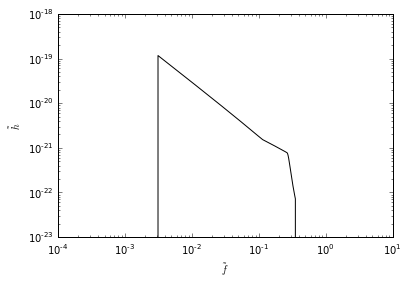

In [52]:
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\tilde{f}$')
plt.ylabel(r'$\tilde{h}$')
plt.plot(freqp,Signal,'k-')
plt.savefig('template.eps')

In [15]:
import scipy.integrate as INT

In [16]:
def Snprime(ft,M1,M2):
    M=M1+M2
    factor=M*15.4787466e-6 #second;
    freqp=freq*factor
    Snp=noise3**2/factor
    return np.interp(ft,freqp,Snp)
#    return Snp

In [40]:
gamma(4,10.,10.,0.,0.)

[0, 0.11247374999999986, 0.256496875, 0.35026875]

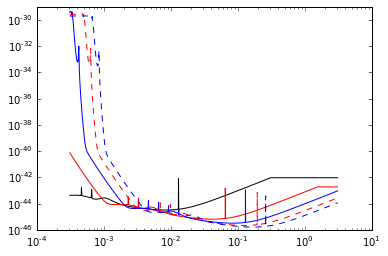

In [17]:
MM=[1.,5.,10.,15.,20.,]
LS=['k-','r-','b-','r--','b--']
for i in range(0,5):
    #integrant=lambda f:4.0*Cp(MM[i],MM[i],1e6,0,0.5,0.5,0.5)**2*gamma(f,MM[i],MM[i],0.,0.)[0]**2/Snprime(f,M1,M2)
#    integrant=lambda f:1./Snprime(f,M1,M2)
    SNPR=[Snprime(x,MM[i],MM[i]) for x in freqp]
    plt.xscale('log')
    plt.yscale('log')
    plt.plot(freqp,SNPR,LS[i])

In [41]:
def rho2(M1,M2,chi1,chi2,D,i,theta,phi,psi):
    def integrant(f):
        return gamma(f,M1,M2,chi1,chi2)[0]**2/Snprime(f,M1,M2)
    M=M1+M2
    factor=M*15.4787466e-6
    #freqplow=factor*freq[0]
    #freqphigh=factor*freq[-1]
    f3=gamma(0,M1,M2,chi1,chi2)[3]
    return 4.0*Cp(M1,M2,D,i,theta,phi,psi)**2*INT.quad(integrant,f0,f3)[0]
    #return INT.quad(integrant,freqp[0],freqp[-1])[0]

In [ ]:
# Signal2=[x**2 for x in Signal]
# plt.yscale('log')
# plt.xscale('log')
# plt.xlabel(r'$\tilde{f}$')
# plt.ylabel(r'$\tilde{h}$')
# plt.plot(freqp,Signal2,'k-',freqp,Snp,'r-')

In [30]:
gamma(1e-2,5.0,5.0,0.,0.)

[207.7327687607497, 0.11247374999999986, 0.256496875, 0.35026875]

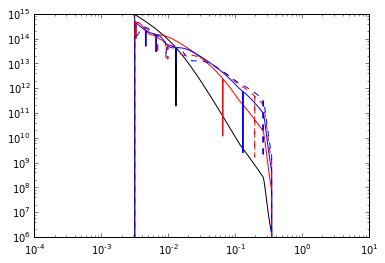

In [45]:
MM=[1.,5.,10.,15.,20.,]
LS=['k-','r-','b-','r--','b--']
#plt.ylim([1e42,1e46])
for i in range(0,5):
    #integrant=lambda f:gamma(f,MM[i],MM[i],0.,0.)[0]
    integrant=lambda f:4.0*Cp(MM[i],MM[i],1e6,0,0.5,0.5,0.5)**2*gamma(f,MM[i],MM[i],0.,0.)[0]**2/Snprime(f,MM[i],MM[i])
    #integrant=lambda f:1./Snprime(f,MM[i],MM[i])
    INTE=[integrant(x) for x in freqp]
    plt.xscale('log')
    plt.yscale('log')
    plt.plot(freqp,INTE,LS[i])

In [46]:
print('%e' % np.sqrt(rho2(5.0,5.0,0.,0.,1e6,0,.1,.1,.1)))

2.250494e+06


In [ ]:
Snprime(freqp[1000],1.0,1.0)

In [ ]:
Cp(10.0,10.0,100,0.1,.5,.5,.5)

In [ ]:
rho2(10.0,10.0,0.1,0.1,10000,0.1,0.5,0.5,0.5)